## Problem Statement

<ul><li>Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.</li>
    <li>As a business manager, try to find out the weak areas where you can work to make more profit.</li> 
    <li>What all business problems you can derive by exploring the data?</li></ul>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Dataset

In [2]:
data_ = pd.read_csv("SampleSuperstore.csv")
data_.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data_.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data_.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data_.shape

(9994, 13)

In [7]:
data_.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data_['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
data_['Ship Mode'].unique()


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

### Context about the dataset

<p>
 The stores are widely spread in many states of US. This stores mainly sells 3 different category
 which are Office Supplies, Furniture and Technology to segments Consumer , Corporate & Home Office. They provide 'Second    Class', 'Standard Class', 'First Class', 'Same Day' types of delivery. </p>

## Data Visualizations

In [10]:
df_aggregated_sales = pd.DataFrame(data_.groupby("Region")[['Sales','Profit']].sum()).reset_index()
df_aggregated_sales

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


<AxesSubplot:xlabel='Region', ylabel='Sales'>

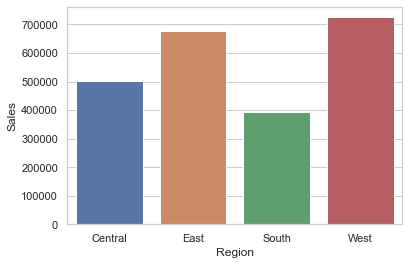

In [11]:
sns.set(style = "whitegrid")
#tdata = sns.load_dataset(df_aggregated_sales)
sns.barplot(x = "Region",y ="Sales",data = df_aggregated_sales)

#### East & West Region has more sales compared to the other regions .  

In [12]:
df_aggregated_cate = pd.DataFrame({'Sales':data_.groupby('Category')['Sales'].sum()}).reset_index()
df_aggregated_cate

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


<AxesSubplot:xlabel='Category', ylabel='Sales'>

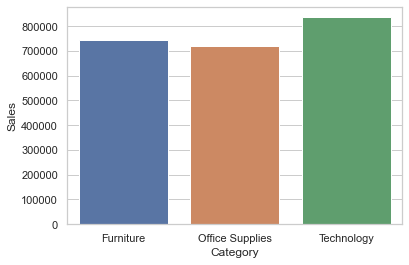

In [13]:
sns.set(style = "whitegrid")
sns.barplot(x="Category",y="Sales",data = df_aggregated_cate)

#### Technology products are majorly sold by this store. Therefore, so they must focus more on technology products.

In [14]:
la = pd.DataFrame(data_.groupby('Category')[['Sales','Profit']].sum()).reset_index()
la

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


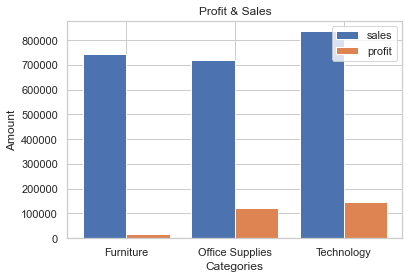

In [15]:
w = 0.4
bar1 = np.arange(len(la['Category']))
bar2 = [i+w for i in bar1]
#print(bar1,bar2)
plt.bar(x=bar1,height='Sales',width = w,label='sales',data=la)
plt.bar(x=bar2,height='Profit',width = w,label='profit',data=la)
plt.ylabel("Amount")
plt.xlabel('Categories')
plt.xticks(bar1+w/2,la['Category'])
plt.title("Profit & Sales")
plt.legend()

#### When Sales & Profit are compared , we can conclude that furniture have less profit , the reason may be stores are providing more discount which results to less profits. On the other side, technology & office supplies have worthwhile profits.

In [16]:
la_states = pd.DataFrame(data_.groupby('State')[['Sales','Profit']].sum()).reset_index()
la_states

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579
5,Connecticut,13384.3570,3511.4918
6,Delaware,27451.0690,9977.3748
7,District of Columbia,2865.0200,1059.5893
8,Florida,89473.7080,-3399.3017
9,Georgia,49095.8400,16250.0433


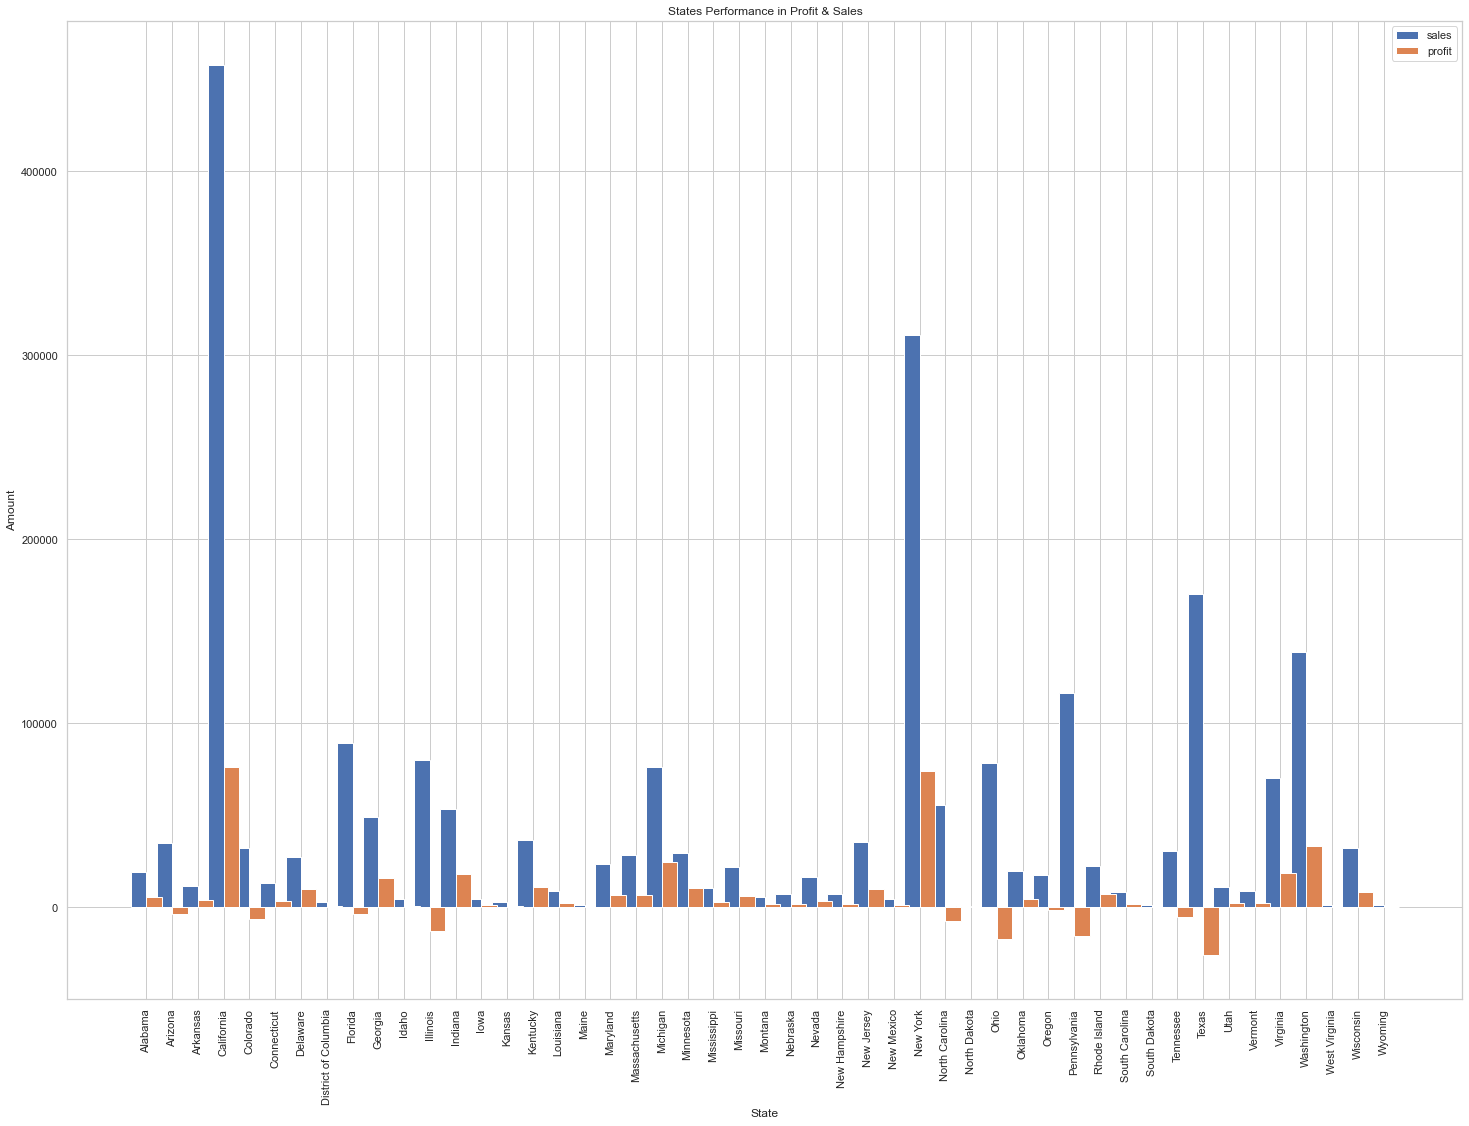

In [17]:
w = 0.6
bar1 = np.arange(len(la_states['State']))
bar2 = [i+w for i in bar1]
#print(bar1,bar2)
plt.figure(figsize=(25,18))
sns.set(style = "whitegrid")
plt.bar(x=bar1,height='Sales',width = w,label='sales',data=la_states)
plt.bar(x=bar2,height='Profit',width = w,label='profit',data=la_states)
plt.ylabel("Amount")
plt.xlabel('State')
plt.xticks(bar1+w/2,la_states['State'],rotation =90)
plt.title("States Performance in Profit & Sales")
plt.legend()

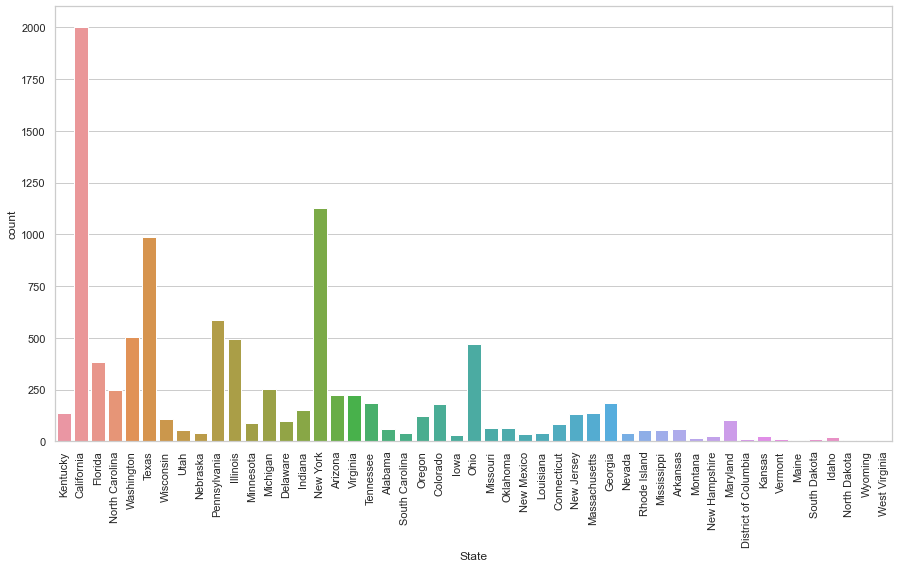

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x=data_['State'])
plt.xticks(rotation=90)
plt.show()

#### In the above plots , we conclude that states like California and New York are outperforming. It is very likely that setting up new store over here would benefit the store company . But the states like Texas , Pennyslvania, Ohio , North California & more have maximum loss, so they should focus more on their marketing strategies

#### Also, it seems like California & New York have other marketing strategies which are beneficial. While other states like Texas , Pennyslvania, Ohio , North California provide heavy discounts to attract customers but may be it's not that effective. So, there is possibility that discounts can led to their loss. 

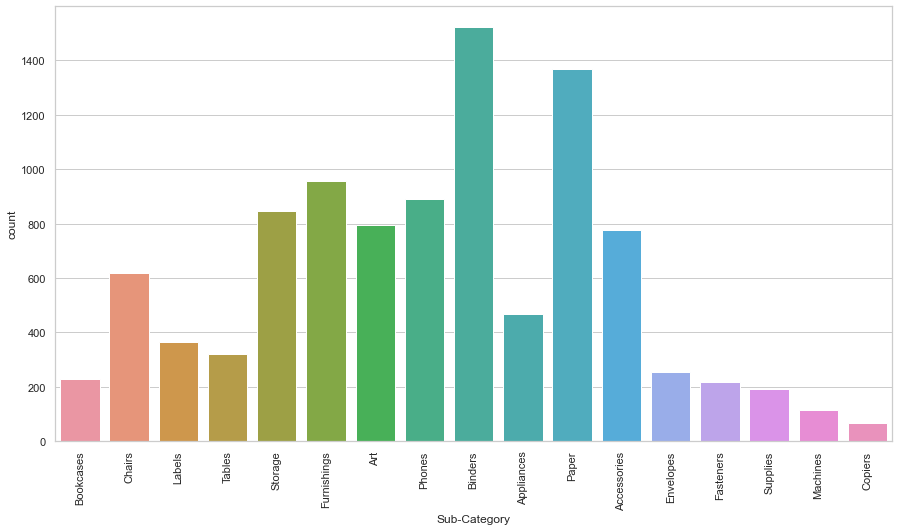

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x=data_['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

#### When we get deeper to categories , we see Binders, Paper on top sub categories . Then, storage, furnishings, Art, Phones on next.